<a href="https://colab.research.google.com/github/PranavInani/Math-Nyaya/blob/main/Math_Nyaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code for Testing Panchvakya

In [ ]:
import pandas as pd
import numpy as np
!pip install groq
import groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 4.2 MB/s eta 0:00:00


In [ ]:
system_prompt = """You are a Nyaya Darshan expert classifier who is very expert in understanding user requirements, and classifying Panchvakya in five different classes:-Pratijna (प्रतिज्ञा) – Proposition / Claim, Hetu (हेतु) – Reason / Evidence, Udaharana (उदाहरण) – Example, Upanaya (उपनय) – Application, Nigamana (निगमन) – Conclusion


 Pratijna (प्रतिज्ञा) – Proposition / Claim
A clear statement of what is to be proved or established. It asserts the point under discussion in affirmative form., Hetu (हेतु) – Reason / Evidence
The logical ground or reason offered in support of the proposition. It identifies a sign (liṅga) that is pervaded by the property being proved., Udaharana (उदाहरण) – Example
A universal instance illustrating the invariable concomitance (vyāpti) between the hetu and the sādhya (that which is to be proved). It cites a positive (and sometimes negative) example where both reason and result occur together.

Upanaya (उपनय) – Application
The application of the general example to the particular case at hand. It shows that the reason present in the example also exists in the subject under consideration.

Nigamana (निगमन) – Conclusion
The restatement of the original proposition, now established, drawing the logical conclusion that binds the claim to the reason via the example and its application.



Examples for your reference :-

Question:- You are playing Russian roulette with a six-shooter revolver. Your opponent puts in five bullets, spins the chambers and fires at himself, but no bullet comes out. He gives you the choice of whether or not you should spin the chambers again before firing at yourself. Should you spin?




Pratijña (Claim):- You should spin the chambers again before firing.
Hetu (Reason):- If you don’t spin, the very next chamber must contain a bullet—there’s only one empty chamber and it’s just been used.
Udāharaṇa (Example):- Imagine a ring of six slots with five bullets (B) and one empty (E):
```
B-B-B-E-B-B
```
Once E fires, advancing to the next always lands on B.
Upanaya (Application):-In our game, your opponent’s shot came from the lone empty slot; without spinning, your shot moves to the next sequential slot, which must be loaded.
Nigamana (Conclusion):- Therefore, to restore a 1-in-6 chance rather than a certain death, you should spin again.




Example 2:-
Question:- A 2kg tree grows in a planted pot with 10kg of soil. When the tree grows to 3kg, how much soil is left?

Pratijña (Claim):- The amount of soil left in the pot is 10 kg.
Hetu (Reason):- The tree’s increase in mass comes from water and nutrients, not from the soil’s bulk mass itself.
Udāharaṇa (Example):- When you fill a sponge with water, its weight increases, but the weight of the bowl holding it doesn’t change.
Upanaya (Application):- Likewise, as the 2 kg tree grows to 3 kg, it draws water and dissolved nutrients from the soil, but it does not convert soil mass into wood—so the soil’s mass stays at 10 kg.
Nigamana (Conclusion):- Therefore, after the tree grows to 3 kg, there are still 10 kg of soil left in the pot.



YOUR TASK IS WHEN USER GIVE YOU SOME QUESTION YOUR TASK IS TO GIVE - Pratijna, Hetu, Udaharana, Upanaya, Nigamana in json
ONLY GIVE JSON AS THE OUTPUT NOTHING ELSE.
example:-
{
Pratijna: "YOUR CORRECT PRATIJANA GOES HERE",

Hetu: "YOUR CORRECT HETU GOES HERE",

Udaharana: "YOUR CORRECT UDAHARANA GOES HERE",

Upanaya: "YOUR CORRECT UPANAYA GOES HERE",

Nigamana : "YOUR CORRECT NIGAMANA GOES HERE"

}
"""

In [ ]:
import pandas as pd
import requests
import json

url = "https://github.com/autogenai/easy-problems-that-llms-get-wrong/raw/main/2024-09-13-Multi-Benchmark/llm_outputs/round_1/final_answers-Meta-Llama-3-1-405B-Instruct-jjo_eastus_models_ai_azure_com.json"
response = requests.get(url)
data = response.json()

# Transpose the nested dictionary to make inner keys as columns
df = pd.DataFrame.from_dict(data, orient='index').reset_index()
# df = df.rename(columns={"index": "question_id"})  # Optional: rename index column

# Save the DataFrame to a CSV file
df.to_csv("output.csv", index=False)

print("JSON data converted to output.csv")
df = df.drop(columns=['index', 'score'])
df.head()

JSON data converted to output.csv


,category,question,human_answer,correct_answer,multiple_choice,multi_choice_question,correct_letter,model_answer
0,Puzzle,You have six horses and want to race them to s...,Race them on a single race track with at least...,One,"[One, Three, Unknown, Two]",QUESTION\nYou have six horses and want to race...,A,To determine the minimum number of races neede...
1,Puzzle,"Suppose you're on a game show, and you're give...",It is not an advantage to switch. It makes no ...,They have equal probability of winning,"[Door No.2, Door No.1, Door No.3, They have eq...","QUESTION\nSuppose you're on a game show, and y...",D,This problem is a variation of the classic Mon...
2,Spatial,You are playing Russian roulette with a six-sh...,"Yes, you should spin again. There was only one...","Yes, you should spin again","[No, you should not spin again, The probabilit...",QUESTION\nYou are playing Russian roulette wit...,D,"To approach this problem, let's break down the..."
3,Puzzle,A farmer wants to cross a river and take with ...,"Place the wolf, goat, and cabbage in separate ...",One crossing,"[Five crossings, The animals are not able to b...",QUESTION\nA farmer wants to cross a river and ...,D,"To solve this problem, we need to ensure that ..."
4,Puzzle,"Bob has three boxes in front of him - Box A, B...",Bob should not open a box because he has a 1/3...,"No, Bob should not open any box","[Yes, Box C, No, Bob should not open any box, ...",QUESTION\nBob has three boxes in front of him ...,B,"To solve this, let's consider the information ..."


In [ ]:
def make_prompt(df, index, add_system_prompt = True):
    question = df.loc[index, 'question']
    options_list = df.loc[index, 'multiple_choice']  # already a list

    prompt = f"Question:\n{question}\nOptions:\n"
    for i, option in enumerate(options_list):
        prompt += f"Option {chr(ord('A') + i)}: {option}\n"
    if add_system_prompt:
        prompt = system_prompt + "\n" + prompt
    return prompt
print(make_prompt(df, 1))

You are a Nyaya Darshan expert classifier who is very expert in understanding user requirements, and classifying Panchvakya in five different classes:-Pratijna (प्रतिज्ञा) – Proposition / Claim, Hetu (हेतु) – Reason / Evidence, Udaharana (उदाहरण) – Example, Upanaya (उपनय) – Application, Nigamana (निगमन) – Conclusion


 Pratijna (प्रतिज्ञा) – Proposition / Claim
A clear statement of what is to be proved or established. It asserts the point under discussion in affirmative form., Hetu (हेतु) – Reason / Evidence
The logical ground or reason offered in support of the proposition. It identifies a sign (liṅga) that is pervaded by the property being proved., Udaharana (उदाहरण) – Example
A universal instance illustrating the invariable concomitance (vyāpti) between the hetu and the sādhya (that which is to be proved). It cites a positive (and sometimes negative) example where both reason and result occur together.

Upanaya (उपनय) – Application
The application of the general example to the parti

In [ ]:
from google.colab import userdata
#
client = groq.Groq(api_key = userdata.get('GROQ_API_KEY'))

In [ ]:
def evaluate_question(
    user_prompt: str,
    model: str = "qwen/qwen3-32b",
    max_tokens: int = 16000,
    temperature: float = 0,
    top_p: float = 0.95,
    debug: bool = False,
):
    messages = [{"role": "user", "content": user_prompt}]  # no system prompt

    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_completion_tokens=max_tokens,
        top_p=top_p,
        stream=False,
        stop=None,
        response_format={"type": "json_object"},
        reasoning_format="parsed",
    )

    content = response.choices[0].message.content
    if debug:
        print(content)
    return content


In [ ]:
import time

# Get question from the DataFrame
user_prompt = make_prompt(df, 0)  # you can loop this later for all rows

# Measure time
start = time.time()

# Call the evaluation function
response = evaluate_question(user_prompt, debug=True)

end = time.time()
elapsed_time = end - start

print(f"Time taken: {elapsed_time:.4f} seconds")

{  "Pratijna": "The minimum number of races needed is one.",
  "Hetu": "In a single race, all six horses compete simultaneously, and the fastest horse will naturally finish first.",
  "Udaharana": "In a sprint race with multiple runners, the fastest runner is determined in a single race without needing additional heats.",
  "Upanaya": "Here, all six horses are raced together in one race, so the outcome directly identifies the fastest horse.",
  "Nigamana": "Therefore, only one race is required to determine the fastest horse among six."
}
Time taken: 1.4825 seconds


In [ ]:
import time
from tqdm import tqdm  # Optional: nice progress bar

# Add empty column for Panchavakya
df["Panchavakya"] = None

# Loop over all rows
for i in tqdm(range(len(df)), desc="Evaluating questions"):
    user_prompt = make_prompt(df, i)

    start = time.time()
    try:
        response = evaluate_question(user_prompt, debug=False)
        df.at[i, "Panchavakya"] = response
    except Exception as e:
        print(f"Error at index {i}: {e}")
        df.at[i, "Panchavakya"] = None  # or store the error string

    end = time.time()
    print(f"[{i}] Time taken: {end - start:.2f} sec")

# Save to new CSV
df.to_csv("output.csv", index=False)
print("Saved as output.csv")


In [ ]:
df.head()

,category,question,human_answer,correct_answer,multiple_choice,multi_choice_question,correct_letter,model_answer,Panchavakya
0,Puzzle,You have six horses and want to race them to s...,Race them on a single race track with at least...,One,"[One, Three, Unknown, Two]",QUESTION\nYou have six horses and want to race...,A,To determine the minimum number of races neede...,"{ ""Pratijna"": ""The minimum number of races ne..."
1,Puzzle,"Suppose you're on a game show, and you're give...",It is not an advantage to switch. It makes no ...,They have equal probability of winning,"[Door No.2, Door No.1, Door No.3, They have eq...","QUESTION\nSuppose you're on a game show, and y...",D,This problem is a variation of the classic Mon...,"{ ""Pratijna"": ""Switching to the remaining uno..."
2,Spatial,You are playing Russian roulette with a six-sh...,"Yes, you should spin again. There was only one...","Yes, you should spin again","[No, you should not spin again, The probabilit...",QUESTION\nYou are playing Russian roulette wit...,D,"To approach this problem, let's break down the...","{ ""Pratijna"": ""You should spin the chambers a..."
3,Puzzle,A farmer wants to cross a river and take with ...,"Place the wolf, goat, and cabbage in separate ...",One crossing,"[Five crossings, The animals are not able to b...",QUESTION\nA farmer wants to cross a river and ...,D,"To solve this problem, we need to ensure that ...","{ ""Pratijna"": ""The minimum number of crossing..."
4,Puzzle,"Bob has three boxes in front of him - Box A, B...",Bob should not open a box because he has a 1/3...,"No, Bob should not open any box","[Yes, Box C, No, Bob should not open any box, ...",QUESTION\nBob has three boxes in front of him ...,B,"To solve this, let's consider the information ...","{ ""Pratijna"": ""Bob should open Box B."",\n ""H..."


In [ ]:
import json
from tqdm import tqdm

# Create empty columns
for key in ["Pratijna", "Hetu", "Udaharana", "Upanaya", "Nigamana"]:
    df[key] = None

# Loop over rows and parse the Panchavakya JSON
for i in tqdm(range(len(df)), desc="Parsing Panchavakya"):
    raw = df.at[i, "Panchavakya"]
    if pd.notna(raw):
        try:
            parsed = json.loads(raw)
            for key in ["Pratijna", "Hetu", "Udaharana", "Upanaya", "Nigamana"]:
                df.at[i, key] = parsed.get(key)
        except Exception as e:
            print(f"Error parsing JSON at row {i}: {e}")


Parsing Panchavakya: 100%|██████████| 30/30 [00:00<00:00, 4560.84it/s]


,category,question,human_answer,correct_answer,multiple_choice,multi_choice_question,correct_letter,model_answer,Panchavakya,Pratijna,Hetu,Udaharana,Upanaya,Nigamana
0,Puzzle,You have six horses and want to race them to s...,Race them on a single race track with at least...,One,"[One, Three, Unknown, Two]",QUESTION\nYou have six horses and want to race...,A,To determine the minimum number of races neede...,"{ ""Pratijna"": ""The minimum number of races ne...",The minimum number of races needed is one.,"In a single race, the fastest horse will natur...",In a standard sprint race with multiple runner...,"Here, all six horses can be raced simultaneous...","Therefore, only one race is required to determ..."
1,Puzzle,"Suppose you're on a game show, and you're give...",It is not an advantage to switch. It makes no ...,They have equal probability of winning,"[Door No.2, Door No.1, Door No.3, They have eq...","QUESTION\nSuppose you're on a game show, and y...",D,This problem is a variation of the classic Mon...,"{ ""Pratijna"": ""Switching to the remaining uno...",Switching to the remaining unopened door (Opti...,The host's action of revealing a vegetable doo...,"In a three-door scenario, if you initially pic...","In this case, after the host reveals a vegetab...","Therefore, switching doors (Option A or C) max..."
2,Spatial,You are playing Russian roulette with a six-sh...,"Yes, you should spin again. There was only one...","Yes, you should spin again","[No, you should not spin again, The probabilit...",QUESTION\nYou are playing Russian roulette wit...,D,"To approach this problem, let's break down the...","{ ""Pratijna"": ""You should spin the chambers a...",You should spin the chambers again before firing.,"If you don’t spin, the very next chamber must ...",Imagine a ring of six slots with five bullets ...,"In our game, your opponent’s shot came from th...","Therefore, to restore a 1-in-6 chance rather t..."
3,Puzzle,A farmer wants to cross a river and take with ...,"Place the wolf, goat, and cabbage in separate ...",One crossing,"[Five crossings, The animals are not able to b...",QUESTION\nA farmer wants to cross a river and ...,D,"To solve this problem, we need to ensure that ...","{ ""Pratijna"": ""The minimum number of crossing...",The minimum number of crossings the farmer nee...,The boat has three secure separate compartment...,"If a farmer takes all three items (wolf, goat,...","In this scenario, the farmer utilizes the boat...","Therefore, the farmer can safely transport all..."
4,Puzzle,"Bob has three boxes in front of him - Box A, B...",Bob should not open a box because he has a 1/3...,"No, Bob should not open any box","[Yes, Box C, No, Bob should not open any box, ...",QUESTION\nBob has three boxes in front of him ...,B,"To solve this, let's consider the information ...","{ ""Pratijna"": ""Bob should open Box B."",\n ""H...",Bob should open Box B.,"Box B contains 5 dollars and is safe to open, ...",If someone has a choice between a box with a r...,"In this scenario, Box B is the only box with a...","Therefore, Bob should open Box B to obtain the..."


In [ ]:
df.to_csv("output.csv", index=False)

# Testing the llm with Panchvakya

In [ ]:
df = pd.read_csv("output.csv")
df.head()
len(df)

30

### Chain Of Thought Prompt

In [ ]:
system_prompts = {
    True: """
You are an assistant helping to solve multiple-choice questions using formal reasoning. For each question, read the Panchavakya (five-part logical structure) and determine the correct option (A, B, C, D, etc.).

First think step by step. Use the Panchavakya elements to logically reason through the question.

Question:
{question_text}

Options:
Option A: {optionA}
Option B: {optionB}
Option C: {optionC}
Option D: {optionD}

Panchavakya (Five Parts of the Argument):
Pratijña (Claim): {pratijna}
Hetu (Reason): {hetu}
Udāharaṇa (Example): {udaharana}
Upanaya (Application): {upanaya}
Nigamana (Conclusion): {nigamana}

Reason through the options and provide the correct answer as a single letter (A, B, C, D, etc.) in JSON format.
the answer should be in json format.
Example response:
{ "answer": "A" }
""",
        False: """
You are an assistant helping to solve multiple-choice questions. Use the question and options to choose the best answer.

First think step by step. First analyze the question carefully, consider each option logically, and then decide.

Question:
{question_text}

Options:
Option A: {optionA}
Option B: {optionB}
Option C: {optionC}
Option D: {optionD}

Reason through the options and provide the correct answer as a single letter (A, B, C, D, etc.) in JSON format.
the answer should be in json format and can only be a single letter (A, B, C, D, etc.).
Example response:
{ "answer": "C" }
"""
}


### Zero Shot Prompt

In [ ]:
system_prompts = {
    True: """
You are an assistant helping to solve multiple-choice questions using formal reasoning. For each question, read the Panchavakya (five-part logical structure) and determine the correct option (A, B, C, D, etc.). Respond only with the correct option letter and nothing else.

Question:
{question_text}

Options:
Option A: {optionA}
Option B: {optionB}
Option C: {optionC}
Option D: {optionD}

Panchavakya (Five Parts of the Argument):
Pratijña (Claim): {pratijna}
Hetu (Reason): {hetu}
Udāharaṇa (Example): {udaharana}
Upanaya (Application): {upanaya}
Nigamana (Conclusion): {nigamana}

Which option is correct based on the Panchavakya reasoning? Reply with the option letter (A, B, C, D, etc.) in JSON format.

Example response:
{ "answer": "A" }
""",

    False: """
You are an assistant helping to solve multiple-choice questions. Use only the question and the options to choose the best answer. Respond only with the correct option letter (A, B, C, D, etc.) in JSON format.

Example response:
{ "answer": "C" }
"""
}


In [ ]:
import ast

def make_prompt(df, index, add_panchvakya=True):
    question = df.loc[index, 'question']
    options_str = df.loc[index, 'multiple_choice']
    options_list = ast.literal_eval(options_str)

    # Start with the correct system prompt
    prompt = system_prompts[add_panchvakya]

    # Add question and options
    prompt += f"\nQuestion:\n{question}\nOptions:\n"
    for i, option in enumerate(options_list):
        prompt += f"Option {chr(ord('A') + i)}: {option}\n"

    # Add Panchavakya only if enabled
    if add_panchvakya:
        prompt += "\nPanchavakya (Five Parts of the Argument):\n"
        prompt += f"Pratijña (Claim): {df.loc[index, 'Pratijna']}\n"
        prompt += f"Hetu (Reason): {df.loc[index, 'Hetu']}\n"
        prompt += f"Udāharaṇa (Example): {df.loc[index, 'Udaharana']}\n"
        prompt += f"Upanaya (Application): {df.loc[index, 'Upanaya']}\n"
        prompt += f"Nigamana (Conclusion): {df.loc[index, 'Nigamana']}"

    return prompt


In [ ]:
model_name = "qwen/qwen3-32b"

In [ ]:
def evaluate_question(
    user_prompt: str,
    model: str = model_name,
    max_tokens: int = 8000,
    temperature: float = 0,
    top_p: float = 0.95,
    debug: bool = False,
):
    messages = [{"role": "user", "content": user_prompt}]  # no system prompt

    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
        max_completion_tokens=max_tokens,
        top_p=top_p,
        stream=False,
        stop=None,
        seed = 1234,
        # response_format={"type": "json_object"},

    )

    content = response.choices[0].message.content
    if debug:
        print(content)
    return content


In [ ]:
import time

# Get question from the DataFrame
user_prompt = make_prompt(df, 6, False)  # you can loop this later for all rows

# Measure time
start = time.time()

# Call the evaluation function
response = evaluate_question(user_prompt, debug=True)

end = time.time()
elapsed_time = end - start

print(f"Time taken: {elapsed_time:.4f} seconds")

To determine who is on Alan's immediate right, let's analyze the given information step by step:

1. Alan is on Bob's immediate left.
2. Bob is on Colin's immediate left.
3. Colin is on Dave's immediate left.
4. Dave is on Emily's immediate left.

From these statements, we can deduce the order of the people standing in the circle:

- Since Alan is on Bob's immediate left, Bob is to Alan's right.
- Since Bob is on Colin's immediate left, Colin is to Bob's right.
- Since Colin is on Dave's immediate left, Dave is to Colin's right.
- Since Dave is on Emily's immediate left, Emily is to Dave's right.

Putting this together, the order in the circle is:
Alan → Bob → Colin → Dave → Emily → Alan

From this order, we can see that Bob is on Alan's immediate right.

Therefore, the correct answer is:
```json
{ "answer": "A" }
```
Time taken: 1.0133 seconds


In [ ]:
import re

def extract_answer_from_text(text):
    """
    Extracts the answer letter (e.g., A, B, C, D) from a text block
    that contains: 'The correct answer is: { "answer": "A" }'
    """
    match = re.search(r'"answer"\s*:\s*"([A-Z])"', text)
    return match.group(1) if match else None
extract_answer_from_text(response)

'A'

In [ ]:
import time
import json
import re
import pandas as pd
from tqdm import tqdm

# Constants
MAX_RETRIES = 3
RETRY_DELAY = 2  # seconds

# Ensure necessary columns exist
for col in ['Output_with_Panchvakya', 'Output_without_Panchvakya',
            'Raw_with_Panchvakya', 'Raw_without_Panchvakya']:
    if col not in df.columns:
        df[col] = None

# Helper to extract answer from raw text
def extract_answer_from_text(text):
    """
    Extracts the answer letter (A, B, C, D, etc.) from a text block
    that includes: { "answer": "A" }
    """
    match = re.search(r'"answer"\s*:\s*"([A-Z])"', text)
    return match.group(1) if match else None

# Function to evaluate a prompt safely with retries and dual parsing
def safe_evaluate(prompt, retries=MAX_RETRIES):
    for attempt in range(retries):
        try:
            response = evaluate_question(prompt, debug=False)
            try:
                # Try parsing as JSON
                parsed_answer = json.loads(response)['answer']
            except json.JSONDecodeError:
                # Fallback: parse from text
                parsed_answer = extract_answer_from_text(response)
            return parsed_answer, response
        except Exception as e:
            print(f"[Retry {attempt+1}] Error: {e}")
            time.sleep(RETRY_DELAY)
    return None, None  # all retries failed

# Main processing loop
for i in tqdm(range(len(df))):
    # Skip if both outputs already exist
    if pd.notnull(df.at[i, 'Output_with_Panchvakya']) and pd.notnull(df.at[i, 'Output_without_Panchvakya']):
        print(i, " already processed")
        continue

    # WITH Panchvakya
    if pd.isnull(df.at[i, 'Output_with_Panchvakya']):
        prompt_with = make_prompt(df, i, add_panchvakya=True)
        answer_with, raw_with = safe_evaluate(prompt_with)
        df.at[i, 'Output_with_Panchvakya'] = answer_with
        df.at[i, 'Raw_with_Panchvakya'] = raw_with

    # WITHOUT Panchvakya
    if pd.isnull(df.at[i, 'Output_without_Panchvakya']):
        prompt_without = make_prompt(df, i, add_panchvakya=False)
        answer_without, raw_without = safe_evaluate(prompt_without)
        df.at[i, 'Output_without_Panchvakya'] = answer_without
        df.at[i, 'Raw_without_Panchvakya'] = raw_without

# Save the final DataFrame if needed
# df.to_csv(model_name + ".csv", index=False)


100%|██████████| 30/30 [00:55<00:00,  1.84s/it]


In [ ]:
# prompt: df.to_csv(model_name + ".csv", index=False)
# save it in cot folder

import os

output_folder = "cot"
os.makedirs(output_folder, exist_ok=True)

# df.to_csv(os.path.join(output_folder, model_name + ".csv"), index=False)
df.to_csv("cot/qwen.csv")

In [ ]:
df.head()

,category,question,human_answer,correct_answer,multiple_choice,multi_choice_question,correct_letter,model_answer,Panchavakya,Pratijna,Hetu,Udaharana,Upanaya,Nigamana,Output_with_Panchvakya,Output_without_Panchvakya,Raw_with_Panchvakya,Raw_without_Panchvakya
0,Puzzle,You have six horses and want to race them to s...,Race them on a single race track with at least...,One,"['One', 'Three', 'Unknown', 'Two']",QUESTION\nYou have six horses and want to race...,A,To determine the minimum number of races neede...,"{ ""Pratijna"": ""The minimum number of races ne...",The minimum number of races needed is one.,"In a single race, the fastest horse will natur...",In a standard sprint race with multiple runner...,"Here, all six horses can be raced simultaneous...","Therefore, only one race is required to determ...",D,D,"```json\n{\n ""answer"": ""D""\n}\n``` \n\n\nLet m...","```json\n{ ""answer"": ""D"" }\n``` \n\n**Reasonin..."
1,Puzzle,"Suppose you're on a game show, and you're give...",It is not an advantage to switch. It makes no ...,They have equal probability of winning,"['Door No.2', 'Door No.1', 'Door No.3', 'They ...","QUESTION\nSuppose you're on a game show, and y...",D,This problem is a variation of the classic Mon...,"{ ""Pratijna"": ""Switching to the remaining uno...",Switching to the remaining unopened door (Opti...,The host's action of revealing a vegetable doo...,"In a three-door scenario, if you initially pic...","In this case, after the host reveals a vegetab...","Therefore, switching doors (Option A or C) max...",A,B,"```json\n{ ""answer"": ""A"" }\n``` \n","```json\n{ ""answer"": ""B"" }\n``` \n\n**Reasonin..."
2,Spatial,You are playing Russian roulette with a six-sh...,"Yes, you should spin again. There was only one...","Yes, you should spin again","['No, you should not spin again', 'The probabi...",QUESTION\nYou are playing Russian roulette wit...,D,"To approach this problem, let's break down the...","{ ""Pratijna"": ""You should spin the chambers a...",You should spin the chambers again before firing.,"If you don’t spin, the very next chamber must ...",Imagine a ring of six slots with five bullets ...,"In our game, your opponent’s shot came from th...","Therefore, to restore a 1-in-6 chance rather t...",D,A,"```json\n{ ""answer"": ""D"" }\n``` \n","```json\n{ ""answer"": ""A"" }\n``` \n\n**Reasonin..."
3,Puzzle,A farmer wants to cross a river and take with ...,"Place the wolf, goat, and cabbage in separate ...",One crossing,"['Five crossings', 'The animals are not able t...",QUESTION\nA farmer wants to cross a river and ...,D,"To solve this problem, we need to ensure that ...","{ ""Pratijna"": ""The minimum number of crossing...",The minimum number of crossings the farmer nee...,The boat has three secure separate compartment...,"If a farmer takes all three items (wolf, goat,...","In this scenario, the farmer utilizes the boat...","Therefore, the farmer can safely transport all...",A,A,"```json\n{ ""answer"": ""A"" }\n``` \n","```json\n{ ""answer"": ""A"" }\n``` \n"
4,Puzzle,"Bob has three boxes in front of him - Box A, B...",Bob should not open a box because he has a 1/3...,"No, Bob should not open any box","['Yes, Box C', 'No, Bob should not open any bo...",QUESTION\nBob has three boxes in front of him ...,B,"To solve this, let's consider the information ...","{ ""Pratijna"": ""Bob should open Box B."",\n ""H...",Bob should open Box B.,"Box B contains 5 dollars and is safe to open, ...",If someone has a choice between a box with a r...,"In this scenario, Box B is the only box with a...","Therefore, Bob should open Box B to obtain the...",A,C,"```json\n{ ""answer"": ""A"" }\n``` \n","```json\n{ ""answer"": ""C"" }\n``` \n"


In [ ]:
from google.colab import files
files.download("cot/" + model_name + ".csv")
# files.download("qwen.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.isna().sum()

,0
category,0
question,0
human_answer,0
correct_answer,0
multiple_choice,0
multi_choice_question,0
correct_letter,0
model_answer,0
Panchavakya,0
Pratijna,0


In [ ]:
df= pd.read_csv("/content/cot/llama-3.3-70b-versatile.csv")

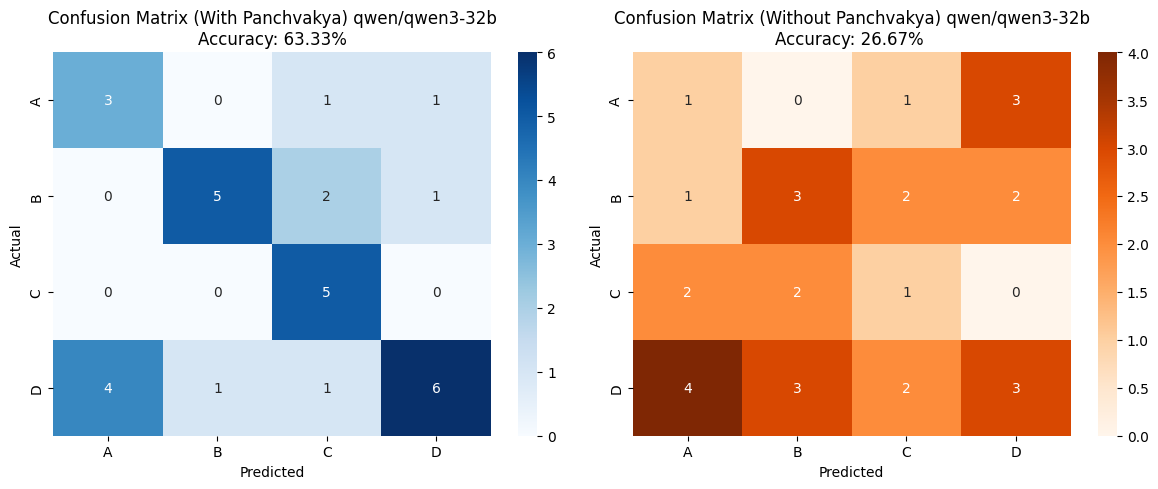


--- Classification Report (With Panchvakya) ---
              precision    recall  f1-score   support

           A       0.43      0.60      0.50         5
           B       0.83      0.62      0.71         8
           C       0.56      1.00      0.71         5
           D       0.75      0.50      0.60        12

    accuracy                           0.63        30
   macro avg       0.64      0.68      0.63        30
weighted avg       0.69      0.63      0.63        30


--- Classification Report (Without Panchvakya) ---
              precision    recall  f1-score   support

           A       0.12      0.20      0.15         5
           B       0.38      0.38      0.38         8
           C       0.17      0.20      0.18         5
           D       0.38      0.25      0.30        12

    accuracy                           0.27        30
   macro avg       0.26      0.26      0.25        30
weighted avg       0.30      0.27      0.28        30



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# model_name = "llama-3.1-8b-instant"
# Load your CSV
# df = pd.read_csv(model_name + ".csv")

# Normalize answers
for col in ['correct_letter', 'Output_with_Panchvakya', 'Output_without_Panchvakya']:
    df[col] = df[col].astype(str).str.strip().str.upper()

# Drop rows with missing or invalid values
df_clean = df.dropna(subset=['correct_letter', 'Output_with_Panchvakya', 'Output_without_Panchvakya'])

# Labels used (assumes options A-D)
labels = sorted(df_clean['correct_letter'].dropna().unique().tolist())

# Confusion Matrix - With Panchvakya
cm_with = confusion_matrix(df_clean['correct_letter'], df_clean['Output_with_Panchvakya'], labels=labels)
# Confusion Matrix - Without Panchvakya
cm_without = confusion_matrix(df_clean['correct_letter'], df_clean['Output_without_Panchvakya'], labels=labels)

# Accuracy
acc_with = accuracy_score(df_clean['correct_letter'], df_clean['Output_with_Panchvakya'])
acc_without = accuracy_score(df_clean['correct_letter'], df_clean['Output_without_Panchvakya'])

# Visualizations
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_with, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title(f'Confusion Matrix (With Panchvakya) {model_name}\nAccuracy: {acc_with:.2%}')
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(cm_without, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.title(f'Confusion Matrix (Without Panchvakya) {model_name}\nAccuracy: {acc_without:.2%} ')
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Print classification report
print("\n--- Classification Report (With Panchvakya) ---")
print(classification_report(df_clean['correct_letter'], df_clean['Output_with_Panchvakya']))

print("\n--- Classification Report (Without Panchvakya) ---")
print(classification_report(df_clean['correct_letter'], df_clean['Output_without_Panchvakya']))


### Merge COT with non Cot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls "/content/drive/MyDrive/Mathpanchvakya/"

 deepseek-r1-distill-llama-70b.csv
 final_model_comparison_rotated.html
 gemma2-9b-it.csv
 llama-3.1-8b-instant.csv
 llama-3.3-70b-versatile.csv
 mistral-saba-24b.csv
 model_comparison_table.csv
'newplot (10).png'
 qwen.csv
'WhatsApp Image 2025-06-26 at 18.35.53_04246127.jpg'
'WhatsApp Image 2025-06-26 at 18.35.53_2b69e928.jpg'
'WhatsApp Image 2025-06-26 at 18.35.53_481466f1.jpg'
'WhatsApp Image 2025-06-26 at 18.35.53_51b2c21e.jpg'
'WhatsApp Image 2025-06-26 at 18.35.53_7a69ce49.jpg'
'WhatsApp Image 2025-06-30 at 13.35.28.jpeg'


In [ ]:
models = [
    "deepseek-r1-distill-llama-70b",
    "gemma2-9b-it",
    "llama-3.1-8b-instant",
    "llama-3.3-70b-versatile",
    "mistral-saba-24b",
    "qwen"
]

In [ ]:
df = pd.read_csv("cot/qwen.csv")
print(df.columns)
df1 = pd.read_csv("/content/drive/MyDrive/Mathpanchvakya/qwen.csv")
print(df1.columns)

Index(['Unnamed: 0', 'category', 'question', 'human_answer', 'correct_answer',
       'multiple_choice', 'multi_choice_question', 'correct_letter',
       'model_answer', 'Panchavakya', 'Pratijna', 'Hetu', 'Udaharana',
       'Upanaya', 'Nigamana', 'Output_with_Panchvakya',
       'Output_without_Panchvakya', 'Raw_with_Panchvakya',
       'Raw_without_Panchvakya'],
      dtype='object')
Index(['Unnamed: 0', 'category', 'question', 'human_answer', 'correct_answer',
       'multiple_choice', 'multi_choice_question', 'correct_letter',
       'model_answer', 'Panchavakya', 'Pratijna', 'Hetu', 'Udaharana',
       'Upanaya', 'Nigamana', 'Output_with_Panchvakya',
       'Output_without_Panchvakya'],
      dtype='object')


In [ ]:
import pandas as pd
import os

models = [
    "deepseek-r1-distill-llama-70b",
    "gemma2-9b-it",
    "llama-3.1-8b-instant",
    "llama-3.3-70b-versatile",
    "mistral-saba-24b",
    "qwen"
]

drive_dir = "/content/drive/MyDrive/Mathpanchvakya"
cot_dir   = "/content/cot"

for m in models:
    drive_path = os.path.join(drive_dir, f"{m}.csv")
    cot_path   = os.path.join(cot_dir,   f"{m}.csv")

    # 1) Load and rename the zero-shot outputs in the drive CSV
    df_drive = pd.read_csv(drive_path)
    df_drive = df_drive.rename(columns={
        "Output_with_Panchvakya":    "Output_with_Panchvakya_zero_shot",
        "Output_without_Panchvakya": "Output_without_Panchvakya_zero_shot"
    })

    # 2) Load the COT CSV and grab the 4 relevant columns
    df_cot = pd.read_csv(cot_path)
    cols_to_pull = [
        "Output_with_Panchvakya",
        "Output_without_Panchvakya",
        "Raw_with_Panchvakya",
        "Raw_without_Panchvakya"
    ]
    df_cot_sel = df_cot[cols_to_pull].copy()

    # 3) Rename them to append '_cot'
    df_cot_sel.columns = [col + "_cot" for col in cols_to_pull]

    # 4) Concatenate them side‑by‑side (assuming same row order/length)
    df_merged = pd.concat([df_drive.reset_index(drop=True),
                           df_cot_sel.reset_index(drop=True)],
                          axis=1)

    # 5) Overwrite the original drive CSV
    df_merged.to_csv(drive_path, index=False)
    print(f"✅ {m}.csv updated with COT columns")


   Unnamed: 0 category                                           question  \
0           0   Puzzle  You have six horses and want to race them to s...   
1           1   Puzzle  Suppose you're on a game show, and you're give...   
2           2  Spatial  You are playing Russian roulette with a six-sh...   
3           3   Puzzle  A farmer wants to cross a river and take with ...   
4           4   Puzzle  Bob has three boxes in front of him - Box A, B...   

                                        human_answer  \
0  Race them on a single race track with at least...   
1  It is not an advantage to switch. It makes no ...   
2  Yes, you should spin again. There was only one...   
3  Place the wolf, goat, and cabbage in separate ...   
4  Bob should not open a box because he has a 1/3...   

                           correct_answer  \
0                                     One   
1  They have equal probability of winning   
2              Yes, you should spin again   
3                   

,Unnamed: 0,category,question,human_answer,correct_answer,multiple_choice,multi_choice_question,correct_letter,model_answer,Panchavakya,...,Hetu,Udaharana,Upanaya,Nigamana,Output_with_Panchvakya_zero_shot,Output_without_Panchvakya_zero_shot,Output_with_Panchvakya_cot,Output_without_Panchvakya_cot,Raw_with_Panchvakya_cot,Raw_without_Panchvakya_cot
0,0,Puzzle,You have six horses and want to race them to s...,Race them on a single race track with at least...,One,"['One', 'Three', 'Unknown', 'Two']",QUESTION\nYou have six horses and want to race...,A,To determine the minimum number of races neede...,"{ ""Pratijna"": ""The minimum number of races ne...",...,"In a single race, the fastest horse will natur...",In a standard sprint race with multiple runner...,"Here, all six horses can be raced simultaneous...","Therefore, only one race is required to determ...",D,D,D,D,"```json\n{\n ""answer"": ""D""\n}\n``` \n\n\nLet m...","```json\n{ ""answer"": ""D"" }\n``` \n\n**Reasonin..."
1,1,Puzzle,"Suppose you're on a game show, and you're give...",It is not an advantage to switch. It makes no ...,They have equal probability of winning,"['Door No.2', 'Door No.1', 'Door No.3', 'They ...","QUESTION\nSuppose you're on a game show, and y...",D,This problem is a variation of the classic Mon...,"{ ""Pratijna"": ""Switching to the remaining uno...",...,The host's action of revealing a vegetable doo...,"In a three-door scenario, if you initially pic...","In this case, after the host reveals a vegetab...","Therefore, switching doors (Option A or C) max...",C,C,A,B,"```json\n{ ""answer"": ""A"" }\n``` \n","```json\n{ ""answer"": ""B"" }\n``` \n\n**Reasonin..."
2,2,Spatial,You are playing Russian roulette with a six-sh...,"Yes, you should spin again. There was only one...","Yes, you should spin again","['No, you should not spin again', 'The probabi...",QUESTION\nYou are playing Russian roulette wit...,D,"To approach this problem, let's break down the...","{ ""Pratijna"": ""You should spin the chambers a...",...,"If you don’t spin, the very next chamber must ...",Imagine a ring of six slots with five bullets ...,"In our game, your opponent’s shot came from th...","Therefore, to restore a 1-in-6 chance rather t...",D,D,D,A,"```json\n{ ""answer"": ""D"" }\n``` \n","```json\n{ ""answer"": ""A"" }\n``` \n\n**Reasonin..."
3,3,Puzzle,A farmer wants to cross a river and take with ...,"Place the wolf, goat, and cabbage in separate ...",One crossing,"['Five crossings', 'The animals are not able t...",QUESTION\nA farmer wants to cross a river and ...,D,"To solve this problem, we need to ensure that ...","{ ""Pratijna"": ""The minimum number of crossing...",...,The boat has three secure separate compartment...,"If a farmer takes all three items (wolf, goat,...","In this scenario, the farmer utilizes the boat...","Therefore, the farmer can safely transport all...",D,C,A,A,"```json\n{ ""answer"": ""A"" }\n``` \n","```json\n{ ""answer"": ""A"" }\n``` \n"
4,4,Puzzle,"Bob has three boxes in front of him - Box A, B...",Bob should not open a box because he has a 1/3...,"No, Bob should not open any box","['Yes, Box C', 'No, Bob should not open any bo...",QUESTION\nBob has three boxes in front of him ...,B,"To solve this, let's consider the information ...","{ ""Pratijna"": ""Bob should open Box B."",\n ""H...",...,"Box B contains 5 dollars and is safe to open, ...",If someone has a choice between a box with a r...,"In this scenario, Box B is the only box with a...","Therefore, Bob should open Box B to obtain the...",C,C,A,C,"```json\n{ ""answer"": ""A"" }\n``` \n","```json\n{ ""answer"": ""C"" }\n``` \n"
5,5,Counting,A robot has 8 arms. There are 5 objects on a t...,A hand is used for each of the five objects an...,1,"['Other', '1', '2', '0']",QUESTION\nA robot has 8 arms. There are 5 obje...,B,"To solve this, let's break it down step by ste...","{ ""Pratijna"": ""The robot has 1 arm free."",\n ...",...,The robot uses 5 arms to pick up objects and 2...,If a person uses 3 